In [153]:
#imports and preamble
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [154]:
#read data
house_prices = pd.read_csv("house_prices.csv")
sqm = house_prices[["size(sqm)"]]
prices = house_prices[["price"]]

In [155]:
#Create linear regression model
linear_regression_model = LinearRegression().fit(sqm,prices)


In [156]:
#read coef and intercept of model
print(linear_regression_model.coef_)
print(linear_regression_model.intercept_)


[[15780.95631313]]
[2691439.76386015]


In [157]:
#Some predictions
print("Prediction for 100sqm: ",linear_regression_model.predict([[100]]))
print("Prediction for 150sqm: ",linear_regression_model.predict([[150]]))
print("Prediction for 200sqm: ",linear_regression_model.predict([[200]]))

Prediction for 100sqm:  [[4269535.39517298]]
Prediction for 150sqm:  [[5058583.2108294]]
Prediction for 200sqm:  [[5847631.02648582]]


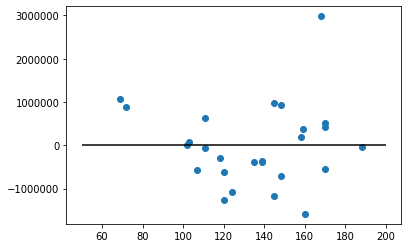

In [158]:
#Linear Regression residual plot
plt.scatter(sqm,linear_regression_model.predict(sqm) - prices)
plt.hlines(y=0, xmin=50, xmax=200)

In [159]:
# Load iris dataset
iris = datasets.load_iris()


In [160]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)

In [164]:
# Create and fit the model to the training data
log_reg = LogisticRegression(random_state=0, multi_class="ovr")
log_reg.fit(x_train, y_train)

112
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<bound method ClassifierMixin.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='warn', tol=0.0001, verbose=0, warm_start=False)>


(3, -0.5)

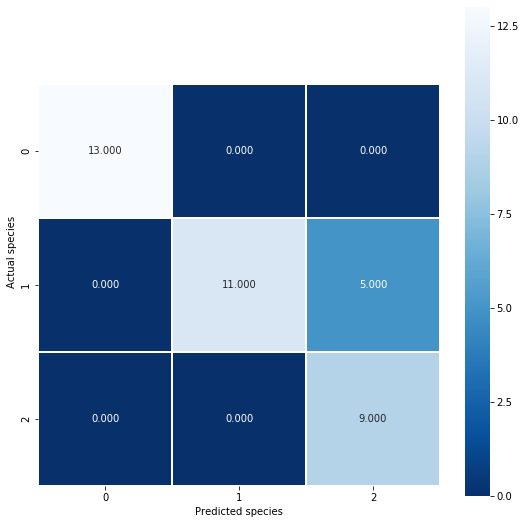

In [166]:
# Create predictions and confusion matrix
predictions = log_reg.predict(x_test)
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Blues_r")
plt.ylabel("Actual species")
plt.xlabel("Predicted species")
plt.ylim(len(conf_matrix),-0.5)